In [10]:
import pandas as pd
import numpy as np
retail_data=pd.read_excel('./Desktop/Lab2/online_retail.xlsx')

In [789]:
#retail_data.Description.nunique()
#retail_data['Description'].unique()
#print(retail_data['Description'].unique())

In [790]:
#drop duplicate rows
retail_data=retail_data.drop_duplicates()

In [791]:
#Remove all cancellations

retail_c=retail_data[retail_data['Invoice'].str[0]!='C']


In [792]:
# columns names to lowercase
retail_c.columns=retail_c.columns.str.lower()

In [793]:
#removing spaces in column name
retail_c.columns=['invoice','stockcode','description','quantity','invoicedate','unitprice','customerid','country']

In [794]:
#changing the datatype to numeric
cols=['invoice','stockcode','quantity','unitprice','customerid']
retail_c[cols]=retail_c[cols].apply(pd.to_numeric,errors='coerce')

C:\Users\Anupama\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [795]:
#columns where stockcode,description is missing 
retail_c1=retail_c.dropna(subset=['stockcode'] ,how='all')
retail_c2=retail_c1.dropna(subset=['description'] ,how='all')
retail_c2=retail_c1.dropna(subset=['customerid'] ,how='all')

In [796]:
retail_c2['description']=retail_c2['description'].str.strip()


C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


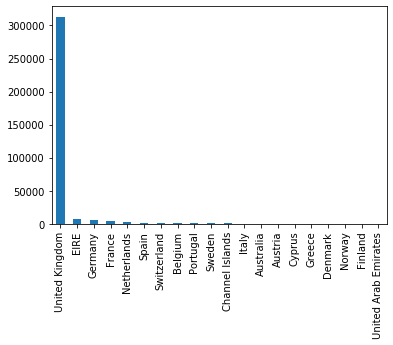

In [797]:
#top 20 countries

import matplotlib.pyplot as plt
retail_c2.country.value_counts()[:20].plot.bar()

In [798]:
#removing countries except UK
retail_uk=retail_c2[retail_c2['country']=="United Kingdom"]

In [799]:
#removing negative quantity(items returned)
retail_uk=retail_uk[retail_uk['quantity']>0]

In [800]:
#removing free items
retail_uk=retail_uk[retail_uk['unitprice']>0]

In [801]:
# calculating total
retail_uk['total']=retail_uk.fillna(0)['quantity']*retail_uk.fillna(0)['unitprice']

In [802]:
#retail_uk=retail_uk[retail_uk['total']<5000]

In [803]:
#year column
retail_uk['year']=retail_uk['invoicedate'].dt.year

In [804]:
#month-year column
import pandas as pd
retail_uk['month_year']=pd.to_datetime(retail_uk['invoicedate']).dt.to_period('M')



C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Creating a PeriodIndex by passing range endpoints is deprecated.  Use `pandas.period_range` instead.
  


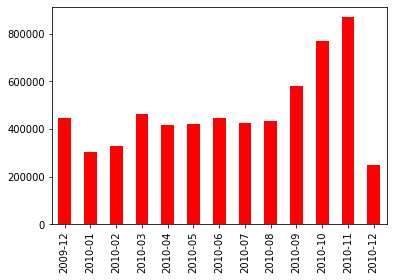

In [805]:
#totalsale amount by month

months = retail_uk['month_year'].sort_values()
start_month = months.iloc[0]
end_month = months.iloc[-1]
index = pd.PeriodIndex(start=start_month, end=end_month)
retail_uk.groupby('month_year')['total'].sum().reindex(index).plot.bar(color='r')

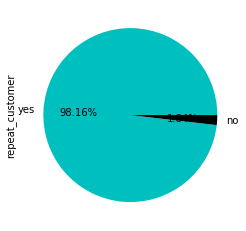

In [806]:
# One time and repeat customer

customer_invoice=retail_uk.groupby('customerid',as_index=False).agg({'invoice':'count'})
import numpy as np
customer_invoice['repeat_customer']=np.where(customer_invoice['invoice']>1,'yes','no')
import matplotlib.pyplot as plt
repeatcount=customer_invoice['repeat_customer'].value_counts()
repeatcount.plot.pie(autopct='%.2f%%',colors=['c','k'])
plt.show()

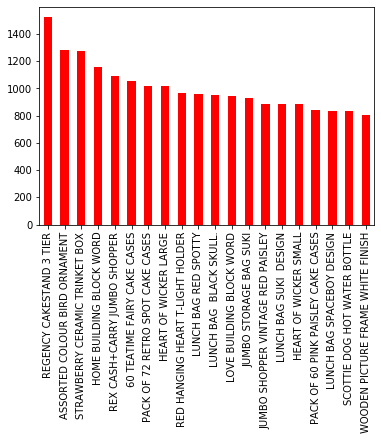

In [807]:
#top20 products

retail_uk.description.value_counts()[:20].plot(kind='bar',color='r')

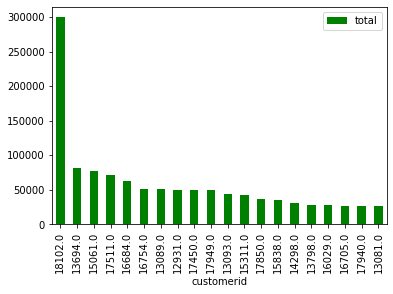

In [808]:
#top20 customers by sale amount
retail_top=retail_uk.groupby('customerid',as_index=False).agg({'total':'sum'})
retail_top20=retail_top.sort_values(by=['total'],ascending=False).head(20)
retail_top20['customerid']=retail_top20.customerid.astype(str)
retail_top20.plot.bar(x='customerid',y='total',color='g')

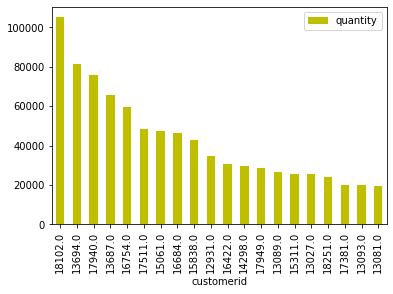

In [809]:
#top20 customer by order placed

retail_top=retail_uk.groupby('customerid',as_index=False).agg({'quantity':'sum'})
retail_top20=retail_top.sort_values(by=['quantity'],ascending=False).head(20)
retail_top20['customerid']=retail_top20.customerid.astype(str)
retail_top20.plot.bar(x='customerid',y='quantity',color='y')

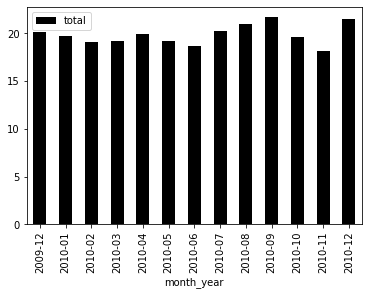

In [810]:
#average sales per month
retail_avg=retail_uk.groupby('month_year',as_index=False)['total'].mean()
retail_avg.plot.bar(x='month_year',y='total',color='k')

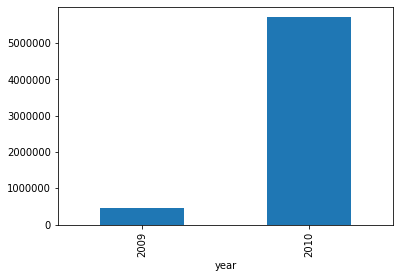

In [811]:
#total sales by year
retail_uk.groupby('year')['total'].sum().plot(kind='bar')

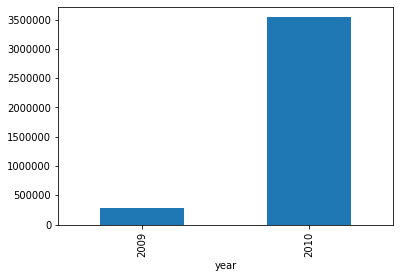

In [812]:
#total quantity by year
retail_uk.groupby('year')['quantity'].sum().plot(kind='bar')


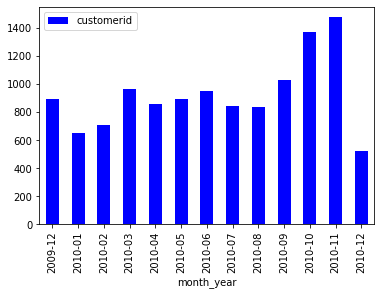

In [813]:
#active customers per month
active=retail_uk.groupby('month_year')['customerid'].nunique().reset_index()
active.plot.bar(x='month_year',y='customerid',color='b')


In [814]:

retail_uk['invoicedate'] = pd.to_datetime(retail_uk['invoicedate']).dt.date

In [835]:
retail_uk.dtypes

invoice          float64
stockcode        float64
description       object
quantity           int64
invoicedate       object
unitprice        float64
customerid       float64
country           object
total            float64
year               int64
month_year     period[M]
dtype: object

In [815]:
# finding first 6 month and last month data

#pd.to_datetime(retail_uk['invoicedate'],format='%Y-%m-%d').max()
#pd.to_datetime(retail_uk['invoicedate'],format='%Y-%m-%d').min()
#retail_uk_6month=retail_uk[(retail_uk['invoicedate']<='2010-12-09')& (retail_uk['invoicedate']>='2009-12-01')].reset_index(drop=True)

In [958]:
#Last Purchase date by the customer

retail_uk_lastpurchase=retail_uk.groupby('customerid').invoicedate.max().reset_index()
retail_uk_lastpurchase.columns=['customerid','lastpurchasedate']

#customerid 
retail_uk_customer=pd.DataFrame(retail_uk['customerid'].unique())
retail_uk_customer.columns=['customerid']


#find the number of days between last purchase and last purchase in the dataset
retail_uk_lastpurchase['lastvisit']=(retail_uk_lastpurchase['lastpurchasedate'].max()-retail_uk_lastpurchase['lastpurchasedate']).dt.days

retail_uk_customer=pd.merge(retail_uk_customer,retail_uk_lastpurchase[['customerid','lastvisit']],on='customerid')

In [959]:
retail_uk_customer.lastvisit.describe()

count    3919.000000
mean       89.887982
std        97.130057
min         0.000000
25%        17.000000
50%        51.000000
75%       135.000000
max       373.000000
Name: lastvisit, dtype: float64

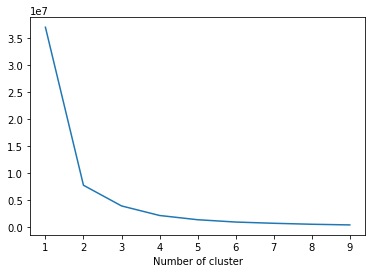

In [960]:
from sklearn.cluster import KMeans
sse={}
retail_uk_lastorder = retail_uk_customer[['lastvisit']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(retail_uk_lastorder)
    retail_uk_lastorder['recencycluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

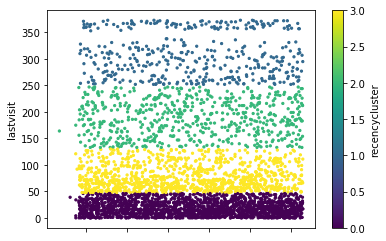

In [961]:
kmodel = KMeans(n_clusters=4)
kmodel.fit(retail_uk_customer[['lastvisit']])
retail_uk_customer['recencycluster']=kmodel.predict(retail_uk_customer[['lastvisit']])
#fig, axes = plt.subplots(1, 2, figsize=(16,8))
ax1=retail_uk_customer.plot.scatter(x='customerid',y='lastvisit',c='recencycluster',colormap='viridis',s=5)

In [962]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


In [963]:
retail_uk_customer.groupby(['recencycluster'])[['lastvisit']].describe()

lastvisit                                                     \
                   count        mean        std    min    25%    50%    75%   
recencycluster                                                                
0                 1874.0   18.599253  13.218886    0.0    8.0   16.0   29.0   
1                  409.0  307.349633  40.104306  252.0  272.0  302.0  356.0   
2                  592.0  188.545608  32.907880  133.0  162.0  186.0  216.0   
3                 1044.0   76.715517  22.570705   48.0   58.0   71.0   92.0   

                       
                  max  
recencycluster         
0                46.0  
1               373.0  
2               247.0  
3               130.0

In [964]:
#frequency

retail_uk_purchasecount=retail_uk.groupby('customerid').invoicedate.nunique().reset_index()
retail_uk_purchasecount.columns=['customerid','purchasecount']

#customerid 
#retail_uk_cf=pd.DataFrame(retail_uk['customerid'].unique())
#retail_uk_cf.columns=['customerid']


#purchase count by customerid

retail_uk_customer=pd.merge(retail_uk_customer,retail_uk_purchasecount,on='customerid')

C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

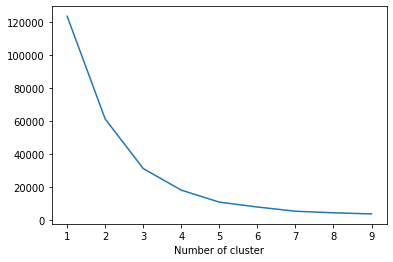

In [965]:
from sklearn.cluster import KMeans
sse={}
retail_uk_purchase = retail_uk_customer[['purchasecount']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(retail_uk_purchase)
    retail_uk_purchase['cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()


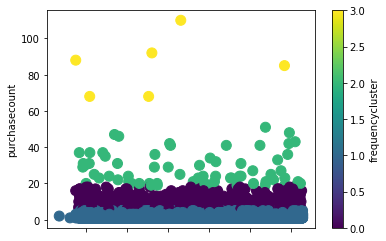

In [966]:
kmodel = KMeans(n_clusters=4)
kmodel.fit(retail_uk_customer[['purchasecount']])
retail_uk_customer['frequencycluster']=kmodel.predict(retail_uk_customer[['purchasecount']])
#fig, axes = plt.subplots(1, 2, figsize=(16,8))
ax1=retail_uk_customer.plot.scatter(x='customerid',y='purchasecount',c='frequencycluster',colormap='viridis',s=100)

In [967]:
retail_uk_customer.groupby(['frequencycluster'])[['purchasecount']].describe()

purchasecount                                           \
                         count       mean        std   min    25%   50%   
frequencycluster                                                          
0                        694.0   8.968300   3.062905   6.0   7.00   8.0   
1                       3153.0   2.146844   1.263130   1.0   1.00   2.0   
2                         66.0  28.181818   8.705275  19.0  21.00  24.5   
3                          6.0  85.166667  15.879757  68.0  72.25  86.5   

                                
                    75%    max  
frequencycluster                
0                 11.00   18.0  
1                  3.00    5.0  
2                 33.75   51.0  
3                 91.00  110.0

In [968]:
#monetary


retail_uk_cost=retail_uk.groupby('customerid')['total'].sum().reset_index()
retail_uk_cost=retail_uk_cost[retail_uk_cost['total']<10000]
retail_uk_customer=pd.merge(retail_uk_customer,retail_uk_cost,on='customerid')

C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

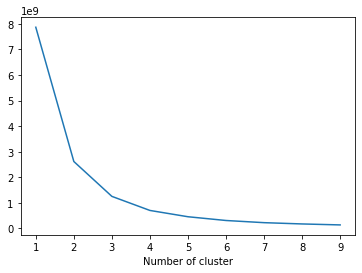

In [969]:
from sklearn.cluster import KMeans
sse={}
retail_uk_total = retail_uk_customer[['total']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=3000).fit(retail_uk_total)
    retail_uk_total['costcluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

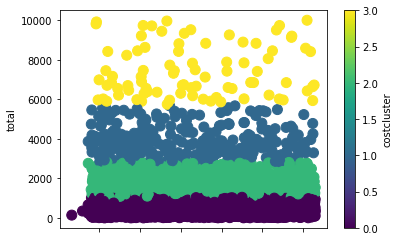

In [970]:
kmodel = KMeans(n_clusters=4)
kmodel.fit(retail_uk_customer[['total']])
retail_uk_customer['costcluster']=kmodel.predict(retail_uk_customer[['total']])
#fig, axes = plt.subplots(1, 2, figsize=(16,8))
ax1=retail_uk_customer.plot.scatter(x='customerid',y='total',c='costcluster',colormap='viridis',s=100)

In [971]:
retail_uk_customer.groupby(['costcluster'])[['total']].describe()

total                                                          \
              count         mean          std      min        25%       50%   
costcluster                                                                   
0            2594.0   398.604329   266.198613     2.95   179.4900   327.905   
1             271.0  3934.025129   770.111224  2837.61  3303.8000  3779.720   
2             900.0  1701.191522   490.653766  1049.29  1276.3475  1585.970   
3              84.0  7451.899405  1300.683797  5747.11  6378.4650  7050.570   

                                 
                   75%      max  
costcluster                      
0             582.6300  1047.68  
1            4462.0850  5666.64  
2            2074.9825  2806.56  
3            8481.0275  9992.36

In [972]:
retail_uk_customer['score']=retail_uk_customer['recencycluster']+retail_uk_customer['frequencycluster']+retail_uk_customer['costcluster']
retail_uk_customer.groupby('score')['lastvisit','purchasecount','total'].mean()


,lastvisit,purchasecount,total
score,,,
0,15.771429,7.085714,861.323714
1,20.571818,3.508182,1037.411736
2,177.357850,4.056577,1051.654625
3,122.275229,3.224771,1204.905390
4,82.473958,2.238281,580.761732
5,108.975309,6.870370,2725.554321
6,73.150754,3.738693,1864.805628
7,58.200000,9.400000,5337.938000
8,70.000000,20.000000,6284.980000


In [973]:
retail_uk_customer.head()

,customerid,lastvisit,recencycluster,purchasecount,frequencycluster,total,costcluster,score
0,13085.0,314,1,3,1,1624.20,2,4
1,15362.0,83,3,2,1,555.78,0,4
2,18087.0,14,0,12,0,9992.36,3,3
3,13635.0,77,3,3,1,1745.19,2,6
4,14110.0,70,3,20,2,6284.98,3,8


In [974]:
# finding first 6 month and last month data

#retail_uk.nlargest(1,'invoicedate')
#retail_uk.slargest(1,'invoicedate')

retail_uk['invoicedate'] = pd.to_datetime(retail_uk['invoicedate'])
retail_uk_6mon=retail_uk[(retail_uk['invoicedate']<'2010-9-01')& (retail_uk['invoicedate']>='2010-03-01')].reset_index(drop=True)
retail_uk_3mon=retail_uk[(retail_uk['invoicedate']>='2010-9-01')& (retail_uk['invoicedate']<'2010-12-01')].reset_index(drop=True)





In [975]:
retail_uk_user=pd.DataFrame(retail_uk_6mon['customerid'].unique())
retail_uk_user.columns=['customerid']

In [976]:
#find the first purchase date in the 3 month list
retail_uk_first_3mon=retail_uk_3mon.groupby('customerid')['invoicedate'].min().reset_index()
retail_uk_first_3mon.columns=['customerid','firstpurchasedate']


#find the last purchase date in 6 month list
retail_uk_last_6mon=retail_uk_6mon.groupby('customerid')['invoicedate'].max().reset_index()
retail_uk_last_6mon.columns=['customerid','lastpurchasedate']


# new dataframe with purchase dates and interval
retail_uk_purchase=pd.merge(retail_uk_last_6mon,retail_uk_first_3mon,on='customerid')
retail_uk_purchase['purchaseinterval']=(retail_uk_purchase['firstpurchasedate']-retail_uk_purchase['lastpurchasedate']).dt.days

# add columns to user dataframe
retail_uk_user=pd.merge(retail_uk_user,retail_uk_purchase[['customerid','purchaseinterval']],on='customerid')



In [946]:
#days between last three purchase 

retail_uk_invoice=retail_uk_6mon[['customerid','invoicedate']]
retail_uk_invoice['invoiceday']=retail_uk_invoice['invoicedate'].dt.date
retail_uk_invoice=retail_uk_invoice.sort_values(['customerid','invoicedate'])
retail_uk_invoice=retail_uk_invoice.drop_duplicates(subset=['customerid','invoicedate'])


C:\Users\Anupama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [947]:
retail_uk_invoice.head(10)


,customerid,invoicedate,invoiceday
997,12346.0,2010-03-02,2010-03-02
88430,12346.0,2010-06-28,2010-06-28
54485,12745.0,2010-05-14,2010-05-14
117902,12745.0,2010-08-10,2010-08-10
81327,12746.0,2010-06-17,2010-06-17
6819,12747.0,2010-03-09,2010-03-09
37903,12747.0,2010-04-23,2010-04-23
64024,12747.0,2010-05-27,2010-05-27
77603,12747.0,2010-06-13,2010-06-13
85333,12747.0,2010-06-23,2010-06-23


In [948]:
#fill the dataframe with three invoice date sequence

retail_uk_invoice['firstpurchase']=retail_uk_invoice.groupby('customerid')['invoiceday'].shift(1)
retail_uk_invoice['secondpurchase']=retail_uk_invoice.groupby('customerid')['invoiceday'].shift(2)
retail_uk_invoice['thirdpurchase']=retail_uk_invoice.groupby('customerid')['invoiceday'].shift(3)


In [949]:
#find the diff btween last invoice and first invoice,last and second invoice,last and third invoice

retail_uk_invoice['firstinterval']=(retail_uk_invoice['invoiceday']-retail_uk_invoice['firstpurchase']).dt.days
retail_uk_invoice['secondinterval']=(retail_uk_invoice['invoiceday']-retail_uk_invoice['secondpurchase']).dt.days
retail_uk_invoice['thirdinterval']=(retail_uk_invoice['invoiceday']-retail_uk_invoice['thirdpurchase']).dt.days



In [950]:
retail_uk_invoice.head(25)

,customerid,invoicedate,invoiceday,firstpurchase,secondpurchase,thirdpurchase,firstinterval,secondinterval,thirdinterval
997,12346.0,2010-03-02,2010-03-02,NaN,NaN,NaN,NaN,NaN,NaN
88430,12346.0,2010-06-28,2010-06-28,2010-03-02,NaN,NaN,118.0,NaN,NaN
54485,12745.0,2010-05-14,2010-05-14,NaN,NaN,NaN,NaN,NaN,NaN
117902,12745.0,2010-08-10,2010-08-10,2010-05-14,NaN,NaN,88.0,NaN,NaN
81327,12746.0,2010-06-17,2010-06-17,NaN,NaN,NaN,NaN,NaN,NaN
6819,12747.0,2010-03-09,2010-03-09,NaN,NaN,NaN,NaN,NaN,NaN
37903,12747.0,2010-04-23,2010-04-23,2010-03-09,NaN,NaN,45.0,NaN,NaN
64024,12747.0,2010-05-27,2010-05-27,2010-04-23,2010-03-09,NaN,34.0,79.0,NaN
77603,12747.0,2010-06-13,2010-06-13,2010-05-27,2010-04-23,2010-03-09,17.0,51.0,96.0
85333,12747.0,2010-06-23,2010-06-23,2010-06-13,2010-05-27,2010-04-23,10.0,27.0,61.0


In [951]:
#calculating mean and std for firstinterval

retail_uk_invoice_stat=retail_uk_invoice.groupby('customerid').agg({'firstinterval':['mean','std']}).reset_index()
retail_uk_invoice_stat.columns=['customerid','firstmean','firststd']

In [952]:
retail_uk_invoice_stat.head()

,customerid,firstmean,firststd
0,12346.0,118.00000,NaN
1,12745.0,88.00000,NaN
2,12746.0,NaN,NaN
3,12747.0,28.50000,13.575714
4,12748.0,5.16129,3.077843


In [953]:
# drop all invoices for the customer except the last,to make sure there are customer with more than three transaction

retail_uk_invoice_final=retail_uk_invoice.drop_duplicates(subset=['customerid'],keep='last')
retail_uk_invoice_final=retail_uk_invoice_final.dropna()
retail_uk_invoice_final=pd.merge(retail_uk_invoice_final,retail_uk_invoice_stat,on='customerid')


In [954]:
retail_uk_invoice_final.head()

,customerid,invoicedate,invoiceday,firstpurchase,secondpurchase,thirdpurchase,firstinterval,secondinterval,thirdinterval,firstmean,firststd
0,12747.0,2010-08-27,2010-08-27,2010-08-02,2010-06-23,2010-06-13,25.0,65.0,75.0,28.500000,13.575714
1,12748.0,2010-08-12,2010-08-12,2010-08-04,2010-08-03,2010-08-02,8.0,9.0,10.0,5.161290,3.077843
2,12823.0,2010-07-13,2010-07-13,2010-07-01,2010-06-03,2010-05-19,12.0,40.0,55.0,21.666667,7.607014
3,12835.0,2010-08-26,2010-08-26,2010-08-12,2010-07-21,2010-07-06,14.0,36.0,51.0,8.800000,4.862315
4,12836.0,2010-08-26,2010-08-26,2010-07-29,2010-06-06,2010-04-20,28.0,81.0,128.0,37.250000,15.195942


In [955]:
retail_uk_user=pd.merge(retail_uk_user,retail_uk_invoice_final[['customerid','firstinterval','secondinterval','thirdinterval','firstmean','firststd']],on='customerid')

In [956]:
retail_uk_user.head()

,customerid,purchaseinterval,firstinterval,secondinterval,thirdinterval,firstmean,firststd
0,13694.0,26,13.0,28.0,38.0,6.560000,4.407191
1,17241.0,67,3.0,40.0,45.0,19.000000,13.228757
2,17865.0,18,10.0,33.0,45.0,19.444444,13.229806
3,14527.0,6,8.0,22.0,34.0,6.100000,3.346125
4,18231.0,64,10.0,26.0,47.0,11.307692,6.395110
